In [21]:
# Import Necessary Libraries

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

In [22]:

# Import the data from the "heart_failure_clinical_records.csv" file and store it in a DataFrame.
df = pd.read_csv("heart_failure_clinical_records.csv")


# Display the number of rows and columns in the dataset.
print("Number of rows and columns:", df.shape)


# Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (5000, 13)
First few rows of the dataset:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [23]:
# Check for missing values and handle them appropriately.

print("Missing values in the dataset:")
print(df.isna().sum())

Missing values in the dataset:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64


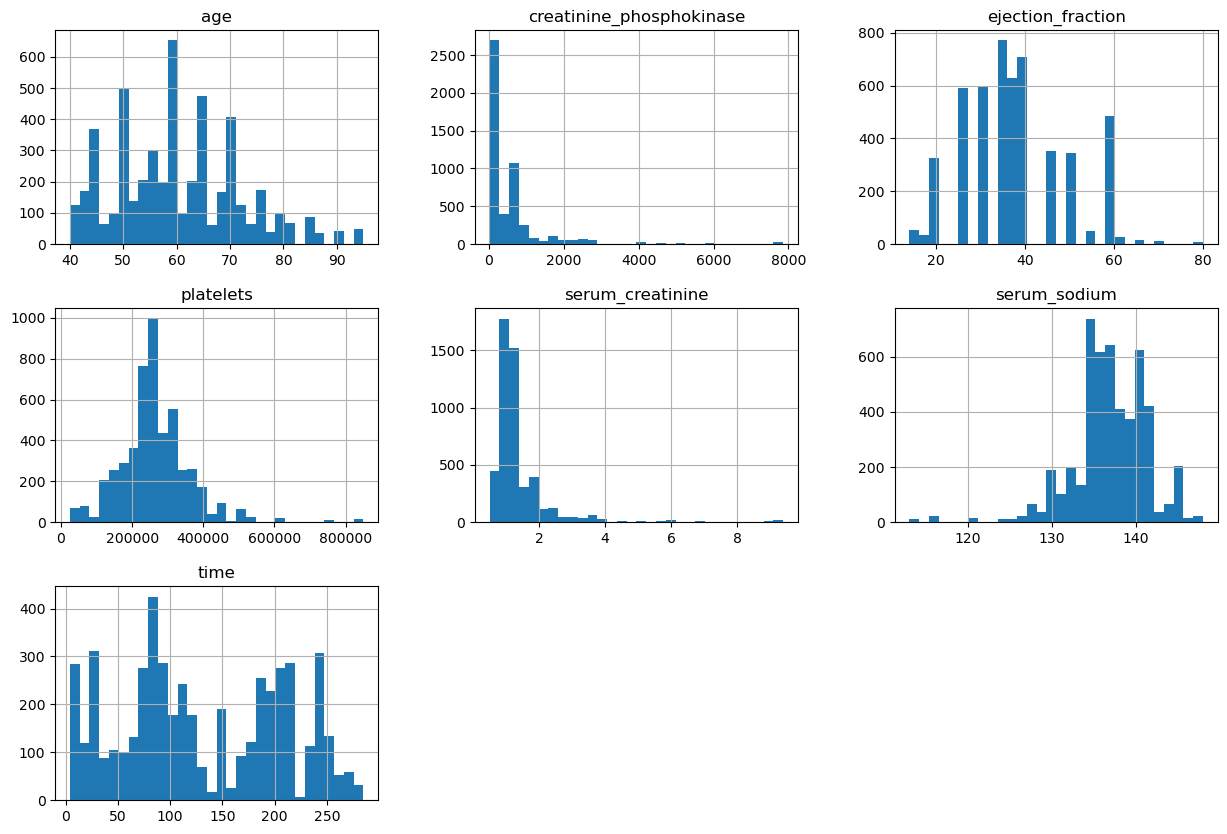

In [24]:
features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
df[features].hist(figsize =(15,10) , bins = 30)
plt.show()

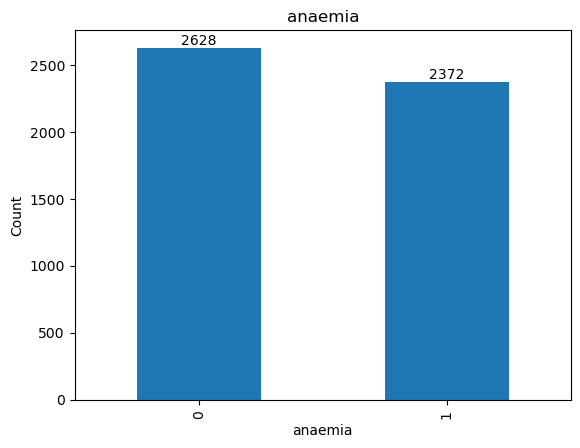

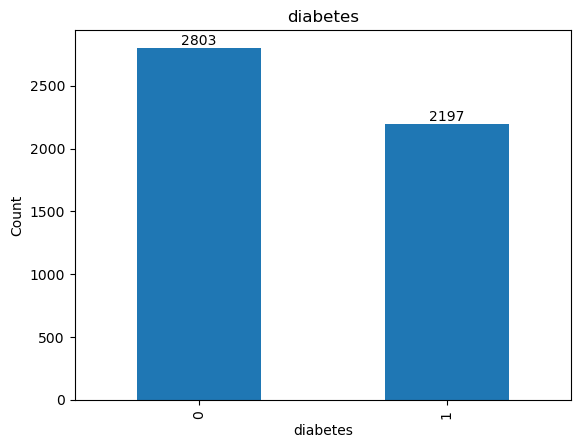

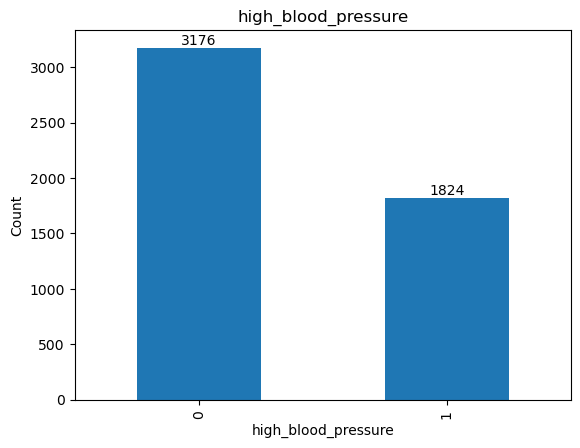

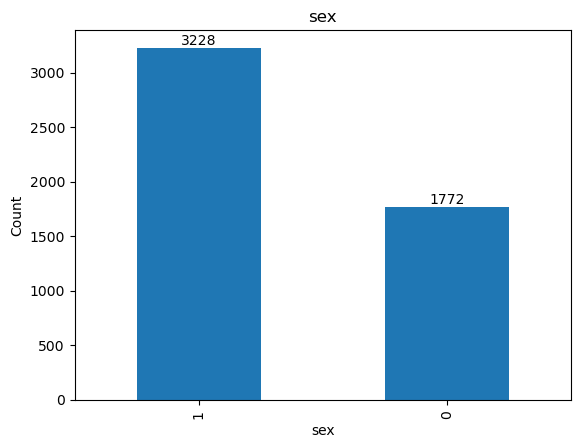

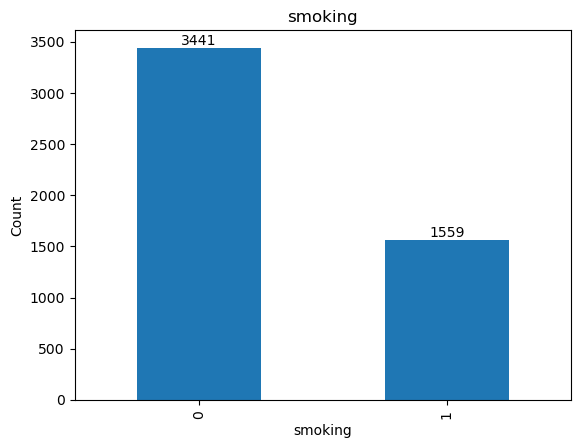

In [39]:
# Bar plots for binary features (anaemia, diabetes, high_blood_pressure, sex, smoking).

binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for feature in binary_features:
    ax = df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.ylabel('Count')   # Label for the y-axis
    
    # Adding value labels on each bar
    for i in ax.containers:
        ax.bar_label(i)
    
    plt.show()


In [40]:
# Split the dataset into training and test sets

X = df.drop(columns=['death_event'])
y = df['death_event']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
# Normalize continuous features using StandardScaler

continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [42]:
# Initialize and train a GaussianNB model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Print the classification report
y_pred_nb = model_nb.predict(X_test)
print("Classification Report for GaussianNB:")
print(classification_report(y_test, y_pred_nb))

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       881
           1       0.75      0.47      0.58       369

    accuracy                           0.80      1250
   macro avg       0.78      0.70      0.72      1250
weighted avg       0.79      0.80      0.78      1250



In [43]:
# Calculate the AUC for the GaussianNB model.
probabilities_nb = model_nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, probabilities_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
print("AUC for GaussianNB:", roc_auc_nb)

AUC for GaussianNB: 0.8790854196850709


In [44]:
# Find the probability threshold associated with 85% recall
desired_recall_nb = 0.85
closest_index_nb = np.argmin(np.abs(tpr_nb - desired_recall_nb))
optimal_threshold_nb = thresholds_nb[closest_index_nb]
optimal_fpr_nb = fpr_nb[closest_index_nb]
print(f"Optimal threshold for 85% recall: {optimal_threshold_nb}, FPR: {optimal_fpr_nb}")

Optimal threshold for 85% recall: 0.09000947872507015, FPR: 0.28944381384790013


In [45]:
# Initialize and train an SVM model with a linear kernel
model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train, y_train)

# Print the classification report
y_pred_svm = model_svm.predict(X_test)
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       881
           1       0.74      0.76      0.75       369

    accuracy                           0.85      1250
   macro avg       0.82      0.82      0.82      1250
weighted avg       0.85      0.85      0.85      1250



In [46]:
# Calculate the AUC

probabilities_svm = model_svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probabilities_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("AUC for SVM:", roc_auc_svm)

AUC for SVM: 0.8932292387623082


In [47]:
# Find the probability threshold associated with 90% recall

desired_recall_svm = 0.90
closest_index_svm = np.argmin(np.abs(tpr_svm - desired_recall_svm))
optimal_threshold_svm = thresholds_svm[closest_index_svm]
optimal_fpr_svm = fpr_svm[closest_index_svm]
print(f"Optimal threshold for 90% recall: {optimal_threshold_svm}, FPR: {optimal_fpr_svm}")

Optimal threshold for 90% recall: 0.1824076400721859, FPR: 0.3348467650397276


In [48]:
# Find the probability threshold associated with 90% recall

desired_recall_svm = 0.90
closest_index_svm = np.argmin(np.abs(tpr_svm - desired_recall_svm))
optimal_threshold_svm = thresholds_svm[closest_index_svm]
optimal_fpr_svm = fpr_svm[closest_index_svm]
print(f"Optimal threshold for 90% recall: {optimal_threshold_svm}, FPR: {optimal_fpr_svm}")

Optimal threshold for 90% recall: 0.1824076400721859, FPR: 0.3348467650397276


In [49]:

# Initialize and train an XGBoost model
model_xgb = XGBClassifier(eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Print the classification report
y_pred_xgb = model_xgb.predict(X_test)
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.99      0.98      0.98       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [50]:
# Calculate the AUC
probabilities_xgb = model_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probabilities_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC for XGBoost:", roc_auc_xgb)

AUC for XGBoost: 0.999249436308211


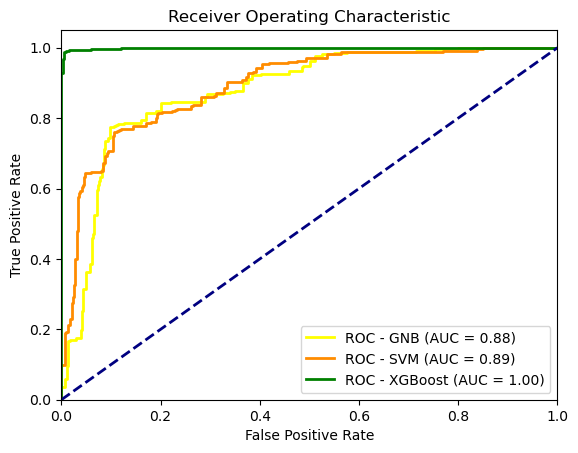

In [51]:
# Plot the ROC curves for all models
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='ROC - GNB (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC - SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='ROC - XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusion

From the results, we can draw the following conclusions based on the performance metrics achieved by each model:

1. GaussianNB Model:
    - Accuracy: 0.80
    - AUC: 0.88
    - Provides a baseline performance with a recall of 47% for the positive class.

2. SVM Model:
    - Accuracy: 0.85
    - AUC: 0.89
    - Shows improvement over GaussianNB, achieving a recall of 76% for the positive class.
   
3. XGBoost Model:
    - Accuracy: 0.99
    - AUC: 1.00
    - Outperforms other models, providing superior performance and generalization.
      
In summary, while GaussianNB and SVM models provide reasonable performance, XGBoost models achieve higher accuracy and AUC, making them more suitable for this classification task. XGBoost, in particular, shows the best overall performance, making it the ideal choice for the heart failure prediction problem.